## Employee Turnover Analytics.


### Project Statement:
Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. 
It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employees’ satisfaction at the workplace.  
The data could be used to identify patterns in work style and their interest in continuing to work in the company. 

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.


As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to
1.    Perform data quality checks by checking for missing values if any.
2.    Understand what factors contributed most to employee turnover by EDA.
3.    Perform clustering of Employees who left based on their satisfaction and evaluation.
4.    Handle the left Class Imbalance using the SMOTE technique.
5.    Perform k-fold cross-validation model training and evaluate performance. 
6.    Identify the best model and justify the evaluation metrics used. 
7.    Suggest various retention strategies for targeted employees.

# What I did in this project:
1.  Perform data quality checks by checking for missing values if any.
2.  Understand what factors contributed most to employee turnover by EDA.
    2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data
    2.2 Draw the distribution plot of 
        Employee Satisfaction (use column satisfaction_level)
        Employee Evaluation (use column last_evaluation)
        Employee Average Monthly Hours (use column average_montly_hours)
    2.3 Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.
3.  Perform clustering of employees who left based on their satisfaction and evaluation
    3.1 Choose columns satisfaction_level, last_evaluation and left
    3.2 Do K-Means clustering of employees who left the company into 3 clusters?
    3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

4.  Handle the left Class Imbalance using the SMOTE technique
    4.1 Pre-process the data by converting categorical columns to numerical columns by
        -   Separating categorical variables and numeric variables.
        -   Applying get_dummies() to the categorical variables.
        -   Combining categorical variables and numeric variables.
    4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123
    4.3 Upsample the train dataset using the SMOTE technique from the imblearn module

5.  Perform k-fold (5-fold) cross-validation model training and evaluate performance
    5.1 Train a Logistic Regression model, apply a 5-fold CV, and plot the classification report
    5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report
    5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

6.  Identify the best model and justify the evaluation metrics used
    6.1 Find the ROC/AUC for each model and plot the ROC curve
    6.2 Find the confusion matrix for each of the models
    6.3 Explain which metric needs to be used from the confusion matrix - Recall or Precision?

7.  Suggest various retention strategies for targeted employees
    7.1 Using the best model, predict the probability of employee turnover in the test data
    7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone:
        -   Safe Zone (Green) (Score < 20%)
        -   Low Risk Zone (Yellow) (20% < Score < 60%)
        -   Medium Risk Zone (Orange) (60% < Score < 90%)
        -   High Risk Zone (Red) (Score > 90%).
    

#### Data Description
satisfaction_level - Satisfaction level at the job of an employee
last_evaluation - Rating between 0 to 1, received by an employee at his last evaluation
number_project - Number of projects an employee is involved in
average_montly_hours - Average number of hours in a month spent by an employee at the office
time_spend_company - Number of years spent in the company
Work_accident
    0 - no accident during employee stay, 
    1 - accident during employee stay
left
    0 indicates employee stays in the company, 
    1 indicates employee left the company
promotion_last_5years - Number of promotions in his stay
Department - Department which an employee belongs to
salary - Salary in USD

In [24]:
!pip install openpyxl

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [38]:
df =  pd.read_excel('./1688640705_hr_comma_sep.xlsx', engine='openpyxl')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [29]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 1.  Perform data quality checks by checking for missing values if any.

In [30]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [31]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# 2.  Understand what factors contributed most to employee turnover by EDA.

2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data

In [33]:
df_categorical = df.select_dtypes(include='object')
df_categorical

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [34]:
df['sales'].value_counts().reset_index()

,sales,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [35]:
# Convert categorical values to numerical using pd.factorize()
df['sales_numerical'], _ = pd.factorize(df['sales'])
df['salary_numerical'], _ = pd.factorize(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_numerical,salary_numerical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0


In [36]:
df['sales_numerical'].value_counts().reset_index()

,sales_numerical,count
0,0,4140
1,3,2720
2,4,2229
3,6,1227
4,7,902
5,8,858
6,9,787
7,1,767
8,2,739
9,5,630


In [56]:
df_numeric = df.select_dtypes(include='number')
df_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


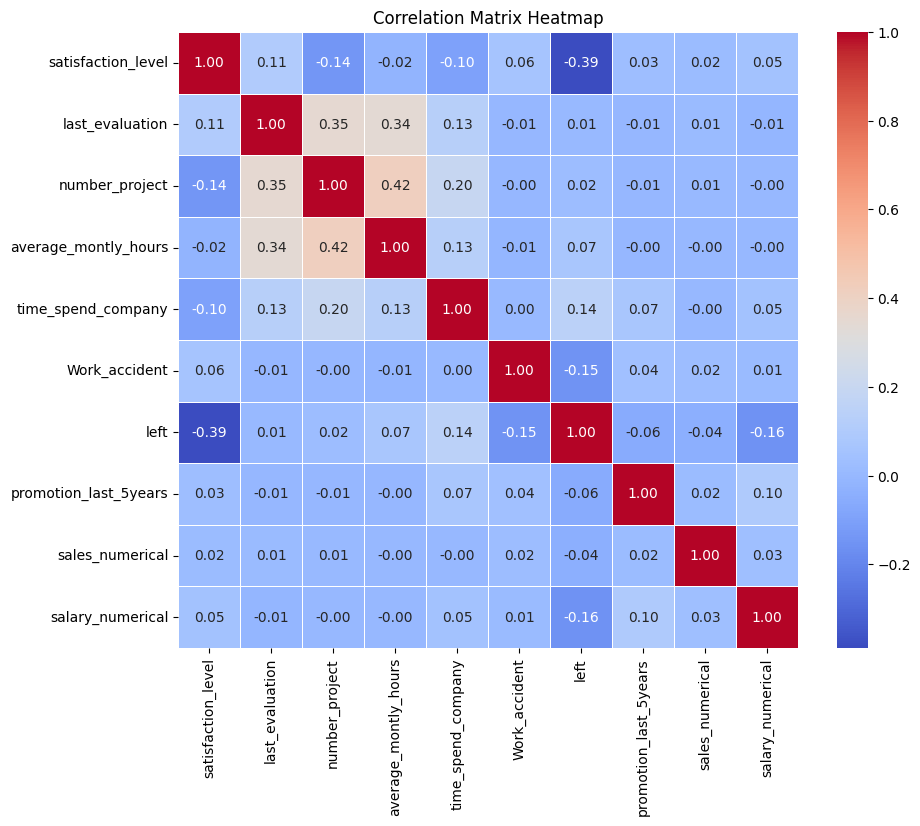

In [49]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 2.2 Draw the distribution plot of 
Employee Satisfaction (use column satisfaction_level)
Employee Evaluation (use column last_evaluation)
Employee Average Monthly Hours (use column average_montly_hours)

In [60]:
target_cols = df_numeric[['satisfaction_level','last_evaluation','average_montly_hours']]

<Figure size 1500x1000 with 0 Axes>

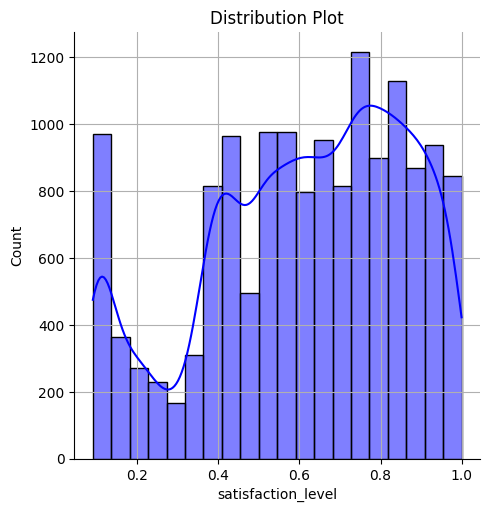

<Figure size 1500x1000 with 0 Axes>

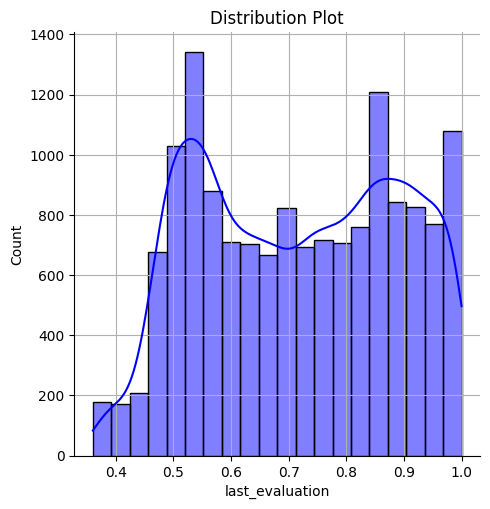

<Figure size 1500x1000 with 0 Axes>

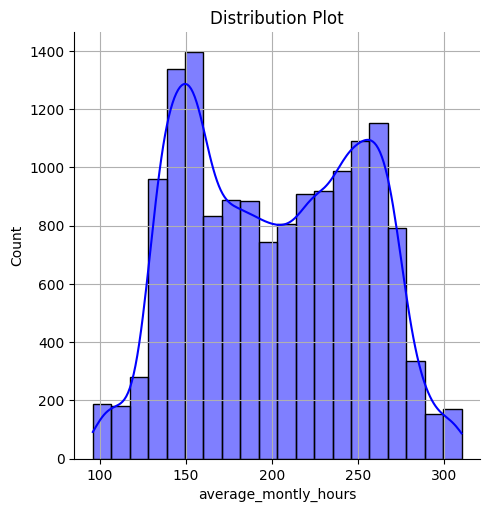

In [69]:
# Draw the distribution plot 

for column in target_cols.columns:
    plt.figure(figsize=(15, 10))
    sns.displot(df[column], kde=True, bins=20, color='blue')
    plt.title('Distribution Plot')
    plt.grid(True)
    plt.show()

2.3 Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

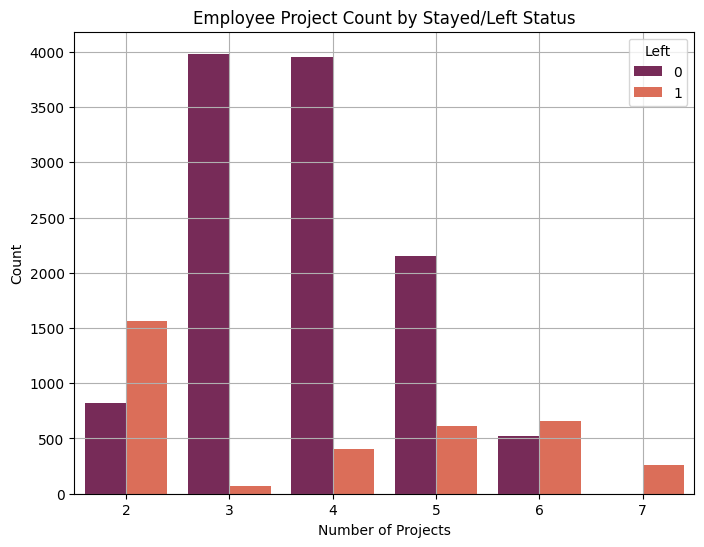

In [103]:
# Draw the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df, palette='rocket')
plt.title('Employee Project Count by Stayed/Left Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left')
plt.grid(True)
plt.show()

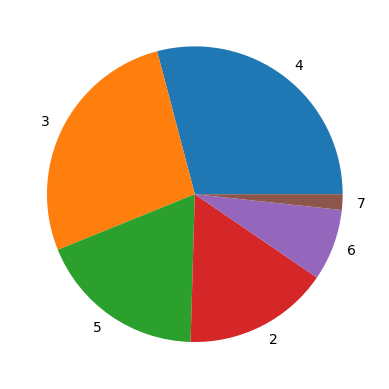

In [112]:
number_projects = df['number_project'].value_counts()
plt.pie(number_projects.values, labels=number_projects.index)
plt.show()

## 3.  Perform clustering of employees who left based on their satisfaction and evaluation
    3.1 Choose columns satisfaction_level, last_evaluation and left

In [110]:
satisf_eval = df[['satisfaction_level','last_evaluation', 'left']]
satisf_eval

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


    3.2 Do K-Means clustering of employees who left the company into 3 clusters?


In [122]:
# Get employees who left the company
employees_left = satisf_eval[satisf_eval['left']==1]
employees_left


,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [121]:
# We extract satisfaction_level and last_evaluation
X = employees_left.iloc[:, [0, 1]].values
X #get our features


array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

In [125]:

#Create a model (we set to 3 clusters, expecting the model will identify 3 groups)
# The model will give us 3 groups of employees based on satisfaction_level and last_evaluation
# to identify why they left


k=3

kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans = KMeans(n_clusters=5, random_state=0)
# df['cluster'] = kmeans.fit_predict(X)
clusters = kmeans.fit_predict(X)
clusters


array([0, 1, 2, ..., 0, 2, 0], dtype=int32)

Text(0, 0.5, 'last_evaluation')

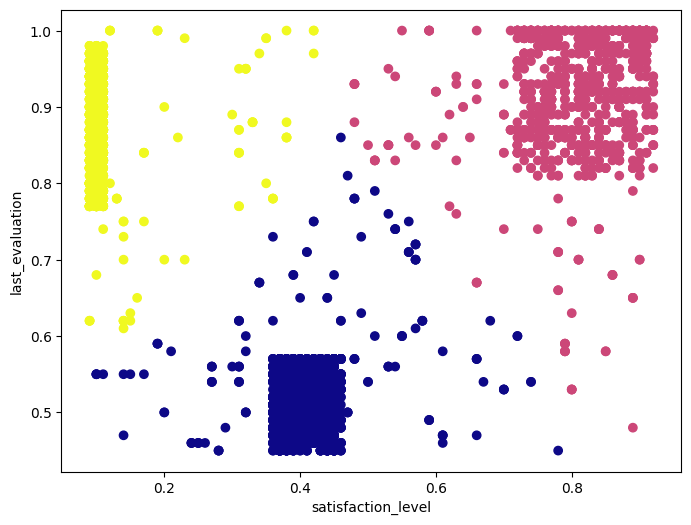

In [126]:


# centroids = kmeans.cluster_centers_
# centroids



plt.figure(figsize=(8,6))

plt.scatter(x=X[:,0], y=X[:,1], c=clusters, cmap='plasma')

plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')

    3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters